<a href="https://colab.research.google.com/github/SnigdhaBairi/Bharat-Intern/blob/main/Indian_Crimes_Analysis_EDA_(2020_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Understanding the Data

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the dataset
file_path = '/content/crime_dataset_india.csv'
df = pd.read_csv(file_path)

In [5]:
df.sample(5)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
11696,11697,04-05-2021 01:00,05-02-2021 08:00,03-05-2021 02:48,Srinagar,398.0,VEHICLE - STOLEN,25.0,M,Other,Violent Crime,12.0,Yes,11-06-2021 01:00
7598,7599,14-11-2020 09:00,11-12-2020 14:00,13-11-2020 03:47,Lucknow,513.0,ASSAULT,19.0,F,Other,Violent Crime,1.0,Yes,25-12-2020 09:00
16975,16976,08-12-2021 11:00,12-08-2021 07:00,08-12-2021 18:10,Bangalore,370.0,DRUG OFFENSE,25.0,X,NaN,Other Crime,8.0,Yes,29-12-2021 11:00
15139,15140,24-09-2021 16:00,09-22-2021 19:00,23-09-2021 05:42,Lucknow,455.0,VANDALISM,54.0,M,Other,Other Crime,16.0,No,NaN
14876,14877,12-09-2021 15:00,09-11-2021 20:00,11-09-2021 21:22,Thane,514.0,CYBERCRIME,72.0,F,Poison,Other Crime,5.0,Yes,23-09-2021 15:00


In [6]:
df.shape

(17089, 14)

In [7]:
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,17089.000000,17088.000000,17088.000000,17088.000000
mean,8545.000000,348.305478,44.226943,10.002341
std,4933.313711,143.435350,20.147127,5.462406
min,1.000000,100.000000,10.000000,1.000000
25%,4273.000000,225.000000,27.000000,5.000000
50%,8545.000000,348.000000,44.000000,10.000000
75%,12817.000000,470.000000,62.000000,15.000000
max,17089.000000,599.000000,79.000000,19.000000


In [8]:
# Checking for missing values
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,1
City,1
Crime Code,1
Crime Description,1
Victim Age,1
Victim Gender,1
Weapon Used,2441


In [9]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# Filling missing values with 'Unknown' (categorical)
df['Weapon Used'] = df['Weapon Used'].fillna('Unknown')

In [11]:
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,17089.000000,17088.000000,17088.000000,17088.000000
mean,8545.000000,348.305478,44.226943,10.002341
std,4933.313711,143.435350,20.147127,5.462406
min,1.000000,100.000000,10.000000,1.000000
25%,4273.000000,225.000000,27.000000,5.000000
50%,8545.000000,348.000000,44.000000,10.000000
75%,12817.000000,470.000000,62.000000,15.000000
max,17089.000000,599.000000,79.000000,19.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17089 entries, 0 to 17088
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Report Number       17089 non-null  int64  
 1   Date Reported       17089 non-null  object 
 2   Date of Occurrence  17089 non-null  object 
 3   Time of Occurrence  17088 non-null  object 
 4   City                17088 non-null  object 
 5   Crime Code          17088 non-null  float64
 6   Crime Description   17088 non-null  object 
 7   Victim Age          17088 non-null  float64
 8   Victim Gender       17088 non-null  object 
 9   Weapon Used         17089 non-null  object 
 10  Crime Domain        17088 non-null  object 
 11  Police Deployed     17088 non-null  float64
 12  Case Closed         17088 non-null  object 
 13  Date Case Closed    8544 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.8+ MB


## 2. Fearture Engineering

#### a. Converting dates to proper formats

In [13]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], format='%d-%m-%Y %H:%M', errors='coerce')

In [14]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'])
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')

#### b. Calculate closure duration (in days) for closed cases

In [15]:
df['Case Closure Duration'] = (df['Date Case Closed'] - df['Date Reported']).dt.days

#### c. Handle negative or invalid durations (if any due to unavailability of case closed date

In [16]:
df.loc[df['Case Closure Duration'] < 0, 'Case Closure Duration'] = np.nan

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17089 entries, 0 to 17088
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Report Number          17089 non-null  int64         
 1   Date Reported          17089 non-null  datetime64[ns]
 2   Date of Occurrence     17089 non-null  object        
 3   Time of Occurrence     17088 non-null  object        
 4   City                   17088 non-null  object        
 5   Crime Code             17088 non-null  float64       
 6   Crime Description      17088 non-null  object        
 7   Victim Age             17088 non-null  float64       
 8   Victim Gender          17088 non-null  object        
 9   Weapon Used            17089 non-null  object        
 10  Crime Domain           17088 non-null  object        
 11  Police Deployed        17088 non-null  float64       
 12  Case Closed            17088 non-null  object        
 13  D

#### d. Droping column 'Date Case Closed' (not required) and filling -1 in case closure duration, signifying either case is not closed yet or information not available

In [18]:
df['Case Closure Duration'] = df['Case Closure Duration'].fillna(-1)
df = df.drop('Date Case Closed', axis=1)
print(df.isna().sum())
print(df.head())

Report Number            0
Date Reported            0
Date of Occurrence       0
Time of Occurrence       1
City                     1
Crime Code               1
Crime Description        1
Victim Age               1
Victim Gender            1
Weapon Used              0
Crime Domain             1
Police Deployed          1
Case Closed              1
Case Closure Duration    0
dtype: int64
   Report Number       Date Reported Date of Occurrence Time of Occurrence  \
0              1 2020-01-02 00:00:00   01-01-2020 00:00   01-01-2020 01:11   
1              2 2020-01-01 19:00:00   01-01-2020 01:00   01-01-2020 06:26   
2              3 2020-01-02 05:00:00   01-01-2020 02:00   01-01-2020 14:30   
3              4 2020-01-01 05:00:00   01-01-2020 03:00   01-01-2020 14:46   
4              5 2020-01-01 21:00:00   01-01-2020 04:00   01-01-2020 16:51   

        City  Crime Code Crime Description  Victim Age Victim Gender  \
0  Ahmedabad       576.0    IDENTITY THEFT        16.0             M

#### e. Droping duplicated rows if any

In [19]:
df = df.drop_duplicates()

#### f. Custom encoding for Victim Gender

In [20]:
df['Victim Gender'] = df['Victim Gender'].map({'M': 1, 'F': 0}).fillna(-1)

#### g. Custom encoding for Case Closed or not

In [21]:
df['Case Closed'] = df['Case Closed'].map({'Yes': 1, 'No': 0}).fillna(-1)

In [22]:
# Verify the changes
print("\nEncoding for Victim Gender and Case Closed applied:")
print(df[['Victim Gender', 'Case Closed']].head())


Encoding for Victim Gender and Case Closed applied:
   Victim Gender  Case Closed
0            1.0          0.0
1            1.0          0.0
2            0.0          0.0
3            0.0          1.0
4            0.0          1.0


In [25]:
cleaned_file_path = '/content/crime_dataset_india.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: /content/crime_dataset_india.csv


#### h. Saving the cleaned and processed dataset

## 3. Exploratory Data Analysis

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('/content/crime_dataset_india.csv')
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Case Closure Duration
0,1,2020-01-02 00:00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576.0,IDENTITY THEFT,16.0,1.0,Blunt Object,Violent Crime,13.0,0.0,-1.0
1,2,2020-01-01 19:00:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128.0,HOMICIDE,37.0,1.0,Poison,Other Crime,9.0,0.0,-1.0
2,3,2020-01-02 05:00:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271.0,KIDNAPPING,48.0,0.0,Blunt Object,Other Crime,15.0,0.0,-1.0
3,4,2020-01-01 05:00:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170.0,BURGLARY,49.0,0.0,Firearm,Other Crime,1.0,1.0,119.0
4,5,2020-01-01 21:00:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421.0,VANDALISM,30.0,0.0,Other,Other Crime,18.0,1.0,7.0


#### a. Count of crimes by cities

In [28]:
city_counts = df['City'].value_counts()
print(city_counts)

City
Delhi            2319
Mumbai           1824
Bangalore        1528
Hyderabad        1258
Kolkata          1076
Chennai          1055
Pune              922
Ahmedabad         804
Jaipur            661
Lucknow           630
Surat             464
Kanpur            457
Nagpur            428
Agra              329
Ludhiana          318
Indore            311
Thane             308
Visakhapatnam     307
Ghaziabad         306
Patna             297
Bhopal            291
Meerut            161
Srinagar          160
Varanasi          157
Vasai             153
Kalyan            148
Nashik            147
Faridabad         145
Rajkot            124
Name: count, dtype: int64


#### b. Bar plot for top 10 cities with the highest crime count

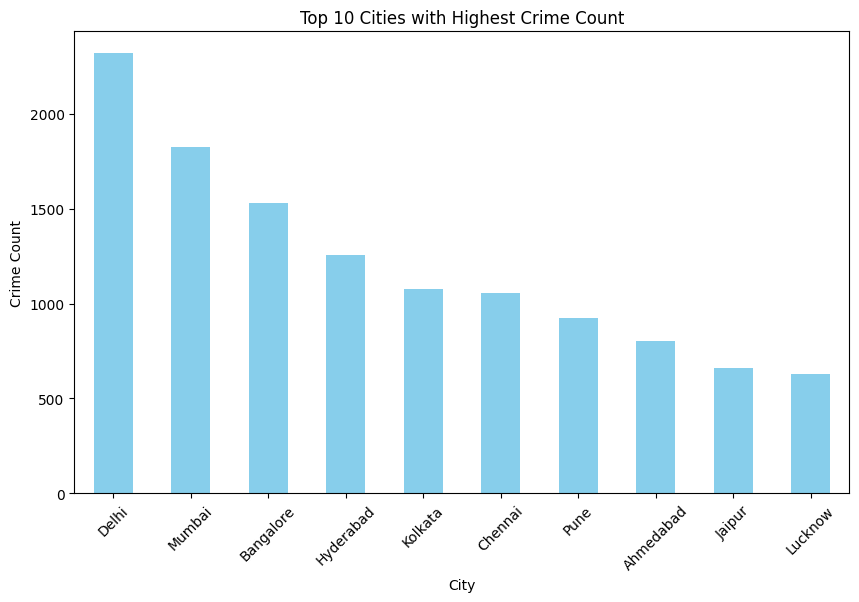

In [29]:
plt.figure(figsize=(10, 6))
city_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with Highest Crime Count')
plt.xlabel('City')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.show()

#### c. Count plot for Victim's Gender

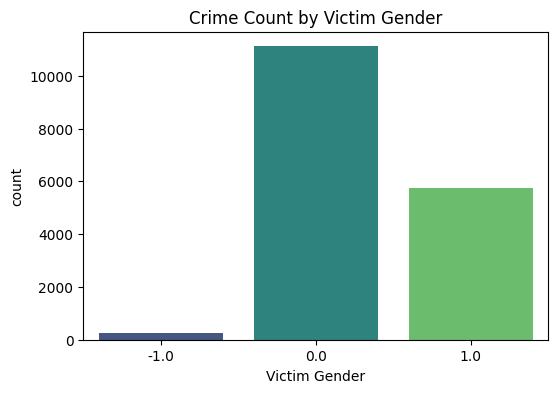

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Victim Gender', palette='viridis')
plt.title('Crime Count by Victim Gender')
plt.show()

### d. Distribution of victim's Age

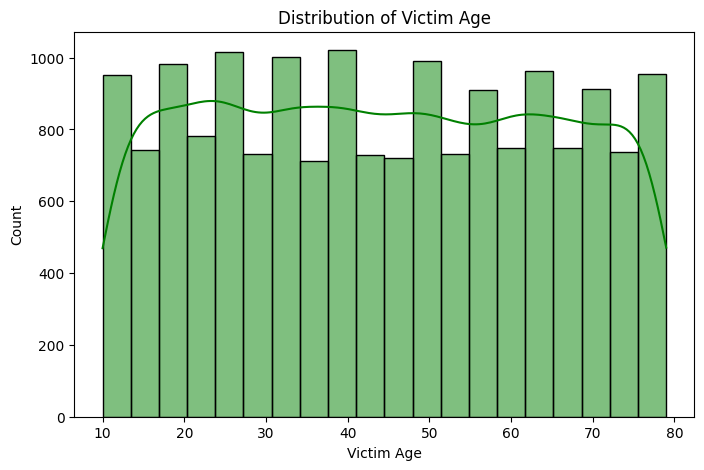

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Victim Age'], bins=20, kde=True, color='green')
plt.title('Distribution of Victim Age')
plt.xlabel('Victim Age')
plt.show()

#### e. Victim's Age vs Case Closure Duration

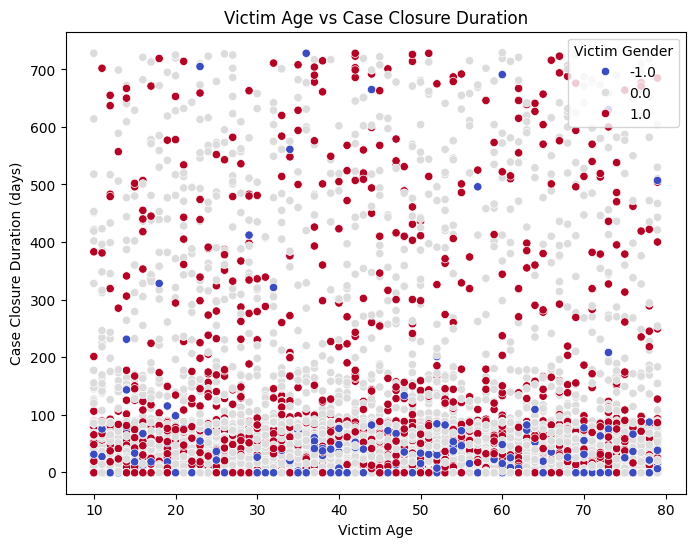

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Victim Age', y='Case Closure Duration', hue='Victim Gender', palette='coolwarm')
plt.title('Victim Age vs Case Closure Duration')
plt.xlabel('Victim Age')
plt.ylabel('Case Closure Duration (days)')
plt.legend(title='Victim Gender')
plt.show()

#### f. Grouping by Crime Code and City

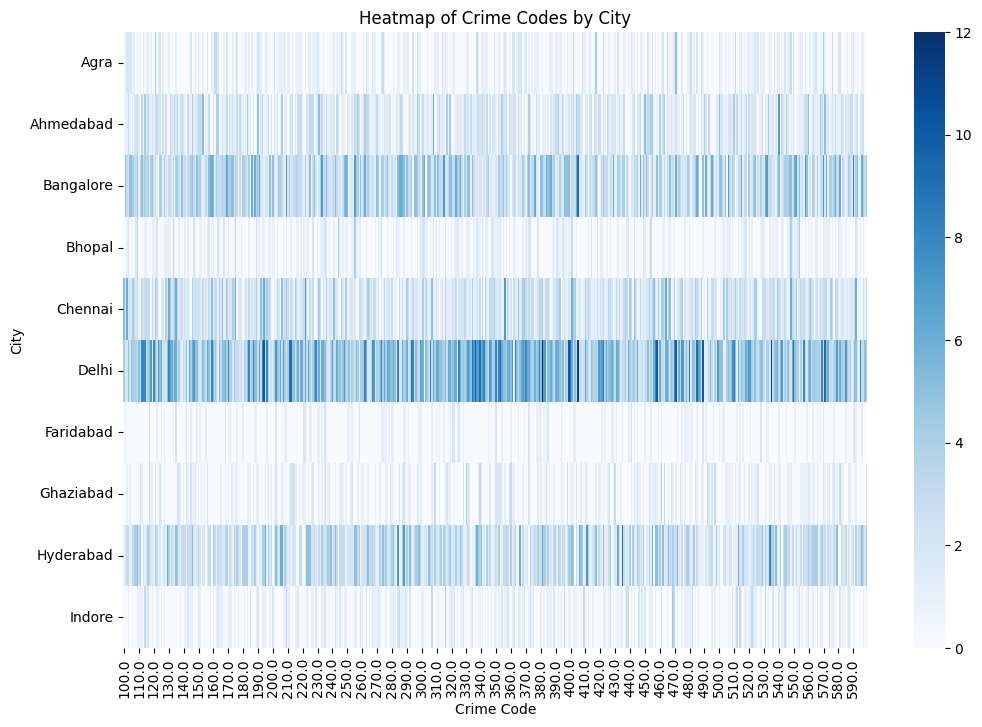

In [33]:
crime_code_city = df.groupby(['City', 'Crime Code']).size().unstack(fill_value=0)

# Heatmap for top 10 cities
plt.figure(figsize=(12, 8))
sns.heatmap(crime_code_city.head(10), cmap='Blues', annot=False, cbar=True)
plt.title('Heatmap of Crime Codes by City')
plt.show()

#### g. Pairplot for numerical columns

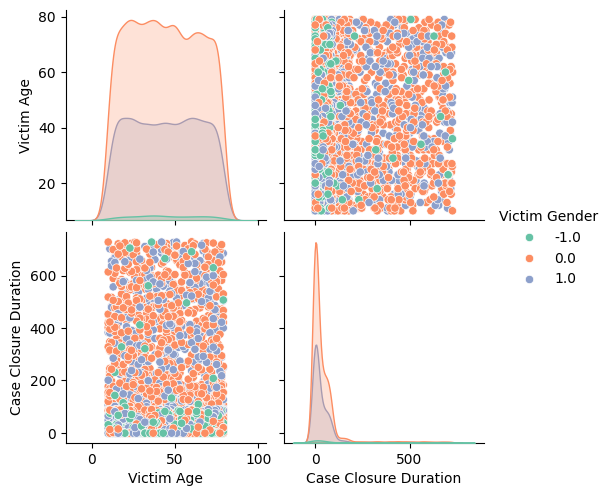

In [34]:
sns.pairplot(df, vars=['Victim Age', 'Case Closure Duration'], hue='Victim Gender', palette='Set2')
plt.show()

#### h. Extract year and month for better plotting

In [35]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

df['Year'] = df['Date Reported'].dt.year
df['Month'] = df['Date Reported'].dt.month

# Group by Year and Month
monthly_trends = df.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

#### Deleting the August 2024 data as only 1st week of August 2024 is covered which is making it an unwanted outlier

In [36]:
# Filtering out records with the 8th month of the year 2024
df = df[~((df['Year'] == 2024) & (df['Month'] == 8))]

# Verifying the records have been removed
print(df[(df['Year'] == 2024) & (df['Month'] == 8)])  # This should return an empty DataFrame

Empty DataFrame
Columns: [Report Number, Date Reported, Date of Occurrence, Time of Occurrence, City, Crime Code, Crime Description, Victim Age, Victim Gender, Weapon Used, Crime Domain, Police Deployed, Case Closed, Case Closure Duration, Year, Month]
Index: []


In [37]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

df['Year'] = df['Date Reported'].dt.year
df['Month'] = df['Date Reported'].dt.month

# Group by Year and Month
monthly_trends = df.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

#### i. Plotting the time-series trends of Crime Trends Over Months and Years

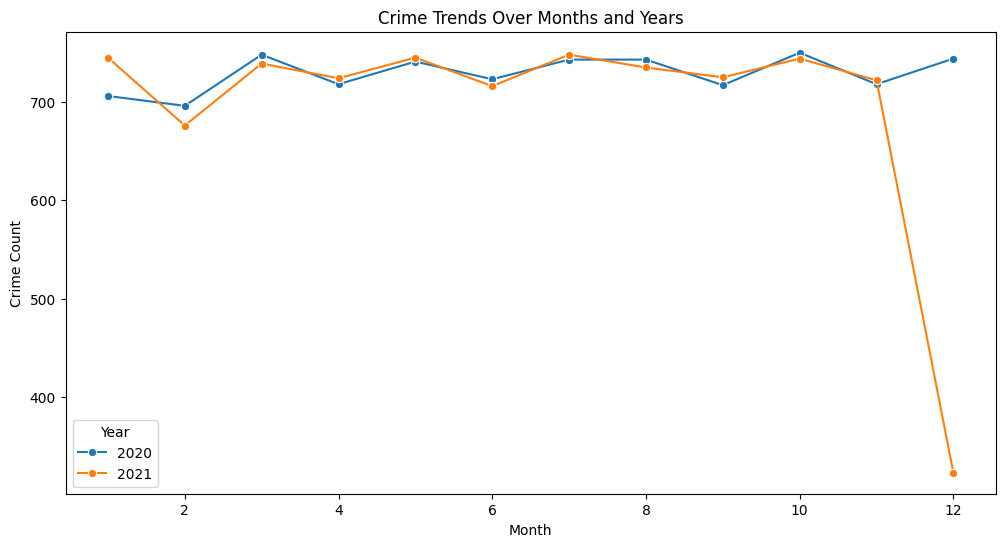

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='Month', y='Crime Count', hue='Year', palette='tab10', marker='o')
plt.title('Crime Trends Over Months and Years')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()

#### j. Plotting Crime Frequency by Day of the Week

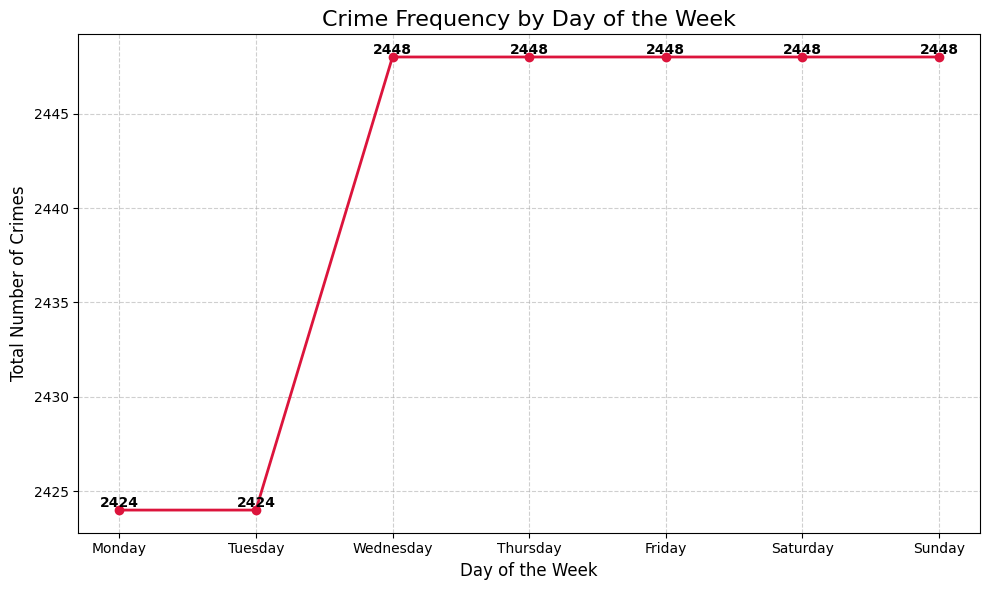

In [39]:
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')
# Extracting weekday names
df['Weekday'] = df['Date of Occurrence'].dt.day_name()
# Counting crimes per day
weekday_counts = df['Weekday'].value_counts()
# Reordering days Monday–Sunday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(days_order).fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(weekday_counts.index, weekday_counts.values,
         marker='o', linestyle='-', color='crimson', linewidth=2)

plt.title('Crime Frequency by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Number of Crimes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

for i, count in enumerate(weekday_counts.values):
    plt.text(i, count, str(int(count)), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


- The weekly analysis indicates a uniform distribution of crime with negligible daily variance. The exact repetition of crime counts from Thursday to Sunday suggests an artificial data pattern, leading to the conclusion that crime in this dataset is independent of the day of the week.

## 4. Key Questions to Answer

#### a. Which crime types are most frequent?

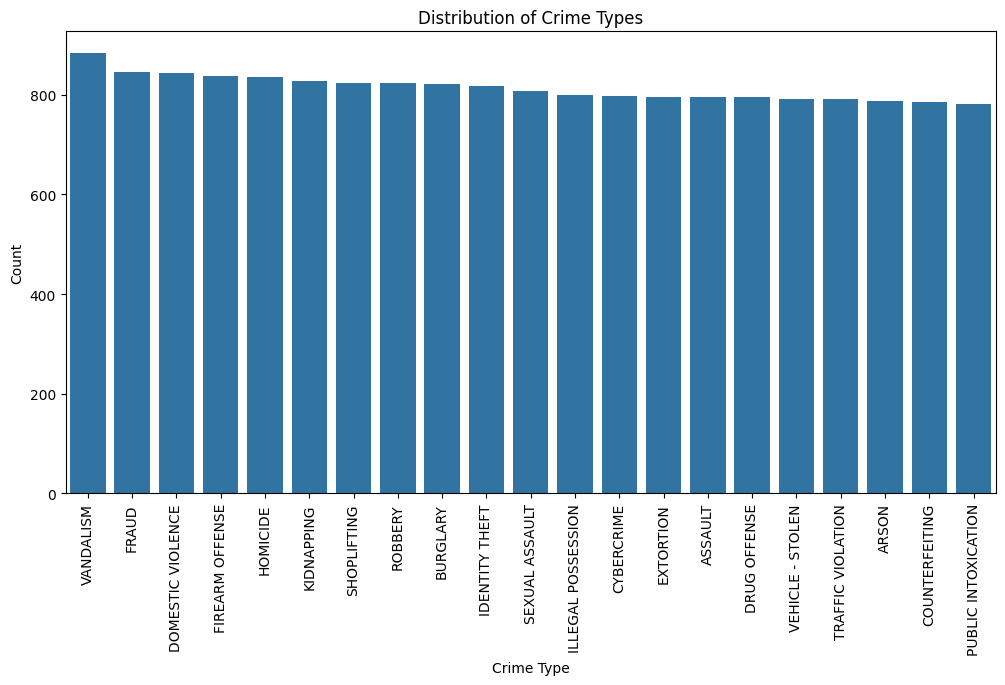

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Crime Description', order=df['Crime Description'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()

- The most common crime types are **Burglary, Vandalism, Fraud, Firearm Offense, Domestic Violence**.
- The least common crime types are **Drug Offense, Extortion, Counterfieting, Vehicle-Stolen, Shoplifting**.

#### b. What weapons are used most often in different crimes?

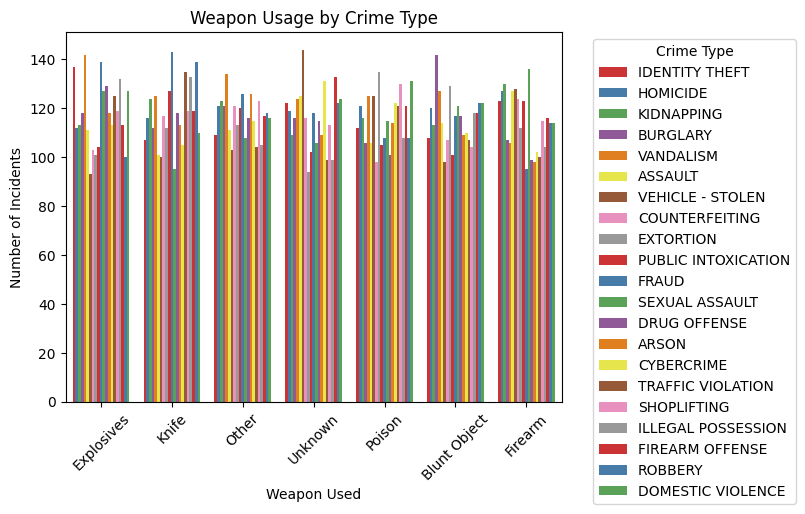

In [41]:
sns.countplot(
    data=df,
    x='Weapon Used',
    hue='Crime Description',
    order=df['Weapon Used'].value_counts().index,
    palette='Set1'
)

plt.title('Weapon Usage by Crime Type')
plt.xticks(rotation=45)
plt.xlabel('Weapon Used')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### c. which is the most used weapon in the crimes?

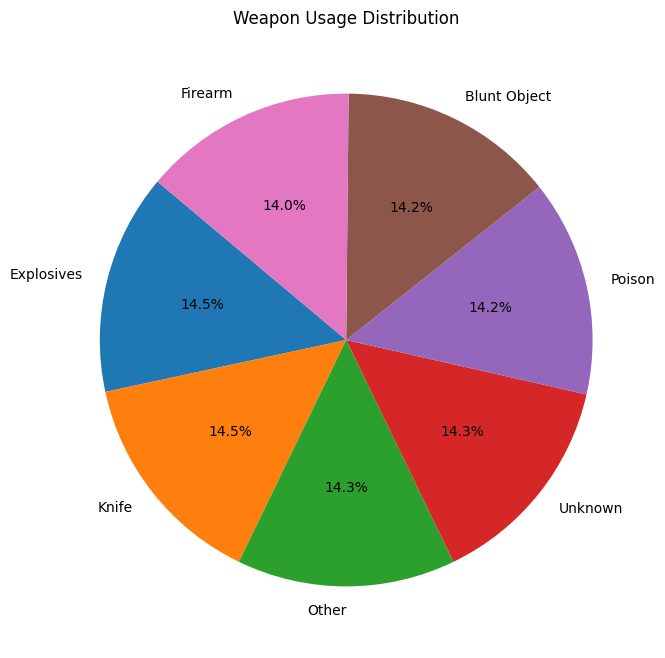

In [42]:
weapon_counts = df['Weapon Used'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(weapon_counts, labels=weapon_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Weapon Usage Distribution')
plt.show()

- Most used weapon is the Knife (Although all share almost same percentage)

## 5. Key Findings

### I. Depending on number of cases across cities

a. **Highest Crime Volume: Delhi** tops the list significantly with over **5,400 reported incidents**, emerging as the primary hotspot for crime in this dataset.

b. **NCR Disparity:** There is a massive gap between the core capital Delhi (5400) and its satellite cities like Ghaziabad (704), Meerut (395), and Faridabad (354). This indicates that criminal activity (or reporting) is heavily concentrated in the central NCT region rather than the periphery.

c. **The "Metro" Effect:** The top 3 positions are held by major Tier-1 metropolitan hubs (Delhi, Mumbai, Bangalore), indicating a strong correlation between high population density/urbanization and crime rates.

d. **Maharashtra's Dominance:** Maharashtra has the highest representation on this list with 7 cities **(Mumbai, Pune, Nagpur, Thane, Nashik, Vasai, Kalyan)**. This suggests that crime recording or occurrence is widespread across the state's urban centers, not just the capital.

### II. Depending on Gender of the victim

a. **Primary Victim Group: Females (0)** are the most affected group by a significant margin, with over **22,000 reported cases**. This is the dominant category in the dataset.

b. **Gender Disparity:** There is a clear gap in victimization; the number of **female victims is roughly 1.6 times higher than male victims** (~13,500).

c. **Male Victimization:** Males (1) account for the second-largest share, with approximately **13,500 cases**, indicating that while lower than females, crimes against men remain a substantial portion of the data.

d. **Data Gaps:** A noticeable segment (~4,500 cases) falls under Unknown Gender (-1). This highlights a data quality issue where victim details were either not recorded, anonymous, or applicable to crimes where individual victim gender isn't relevant (e.g., property damage).

### III. Depending on crimes across the years (number of crimes vs month for each year)

**The "Sawtooth" Seasonality:** There is a **highly repetitive, cyclical pattern** that occurs identically across all five years (2020–2024). The crime trends are not random; they follow a strict monthly rhythm.

Correlation with Days in Month: This is a critical data insight.

- *The Peaks:* High points consistently occur in Jan, Mar, May, Jul, Aug, Oct, Dec. (These are all 31-day months).

- *The Dips:* Low points occur in Feb, Apr, Jun, Sep, Nov. (These are 30-day or 28/29-day months).

***Insight:*** This strongly suggests that the daily crime rate is actually quite constant. The fluctuations in the chart are likely driven by the length of the month rather than seasonal criminal behavior (e.g., February has fewer crimes simply because it has fewer days).